# Visualize particle tracks on maps

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import Image
rc('animation', html='html5')
import xarray as xr
import pickle
from mpl_toolkits.basemap import Basemap
import cmocean

%matplotlib inline

#### Parameters

In [2]:
# colors:
land_color = '#a9a7a2'

# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179
isize = imax - imin
jsize = jmax - jmin

# run result file location:
base_folder = '/ocean/brogalla/GEOTRACES/parcels/Pb-chapter/'

#### Functions

In [3]:
def load_tracks(filename, tracer='dissolpb'):
    file  = xr.open_dataset(filename)
    traj  = file['trajectory'].values # dimensions: number of particles, tracks
    time  = file['time'].values       # units: seconds
    lat   = file['lat'].values        # degrees North
    lon   = file['lon'].values        # degrees East
    depth = file['z'].values          # meters
    trace = file[tracer].values       # tracer concentration
    
    return traj, time, lon, lat, depth, trace

In [41]:
def plot_map_tracks(lont, latt, trajt, tracer, vmin=0, vmax=10, cmap1=cmocean.cm.haline):
    fig, ax1, ax2, proj1, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb-tracks3.pickle','rb'))

    x1, y1 = proj1(lont, latt)
    x2, y2 = proj2(lont, latt)

    x_ANHA12, y_ANHA12 = proj2(mesh_lon, mesh_lat)
    mdomain = np.zeros(mesh_lon.shape)
    mdomain[imin:imax, jmin:jmax] = 1
    mask_domain = np.ma.masked_where((mdomain > 0.1), mesh_lon)
    
    proj2.contourf(x_ANHA12, y_ANHA12, mask_domain, colors=['#d4d4d3'], zorder=1) # land mask
    proj2.contourf(x_ANHA12, y_ANHA12, bathy_masked[0,:,:], colors=['#d4d4d3'], zorder=1) # land mask
    
    # plot tracks
    for particle in range(0,trajt.shape[0]):
        x_plot1 = x1[particle,:][x1[particle,:] < 1e10]
        y_plot1 = y1[particle,:][y1[particle,:] < 1e10]
        
        x_plot2 = x2[particle,:][x2[particle,:] < 1e10]
        y_plot2 = y2[particle,:][y2[particle,:] < 1e10]

        ax1.scatter(x_plot1, y_plot1, s=0.3, c=tracer[particle,:][y1[particle,:] < 1e10], zorder=4, vmin=vmin, vmax=vmax, cmap=cmap1)
        CB = ax2.scatter(x_plot2, y_plot2, s=0.3, c=tracer[particle,:][y2[particle,:] < 1e10], zorder=4, vmin=vmin, vmax=vmax, cmap=cmap1)


    # mark start locations
    ax1.scatter(x1[:,0], y1[:,0], s=8, c=tracer[:,0], edgecolor='w', linewidth=0.5, zorder=4)
    ax2.scatter(x2[:,0], y2[:,0], s=8, c=tracer[:,0], edgecolor='w', linewidth=0.5, zorder=4)
    
    # Colorbar:
    cbar_ax = fig.add_axes([0.9, 0.5, 0.02, 0.2])
    cbar = fig.colorbar(CB, cax=cbar_ax)
    cbar.set_label('Dissolved Pb [pM]', fontsize=7) 
    cbar_ax.tick_params(axis='both', which='major', labelsize=6)
        
    # fig.colorbar(c, shrink=0.5, label='Time [hours]')
    return

#### Load files

In [8]:
# Load results: 
traj_t1, time_t1, lon_t1, lat_t1, depth_t1, dPb_t1 = load_tracks(f'{base_folder}test-20230225.nc', tracer='dissolpb')
# traj_t2, time_t2, lon_t2, lat_t2, depth_t2, dPb_t2 = load_tracks(f'{base_folder}test2-20230214.nc', tracer='dissolpb')

In [9]:
mesh         = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20230213.nc')
mesh_lon     = mesh['nav_lon'].values
mesh_lat     = mesh['nav_lat'].values
mesh_bathy   = mesh['tmask'][0,:,:,:].values
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
ocean_masked = np.ma.masked_where((mesh_bathy<0.1), mesh_bathy)
depths       = mesh['nav_lev'].values

#### Main section

In [28]:
depths[0]

0.49402538

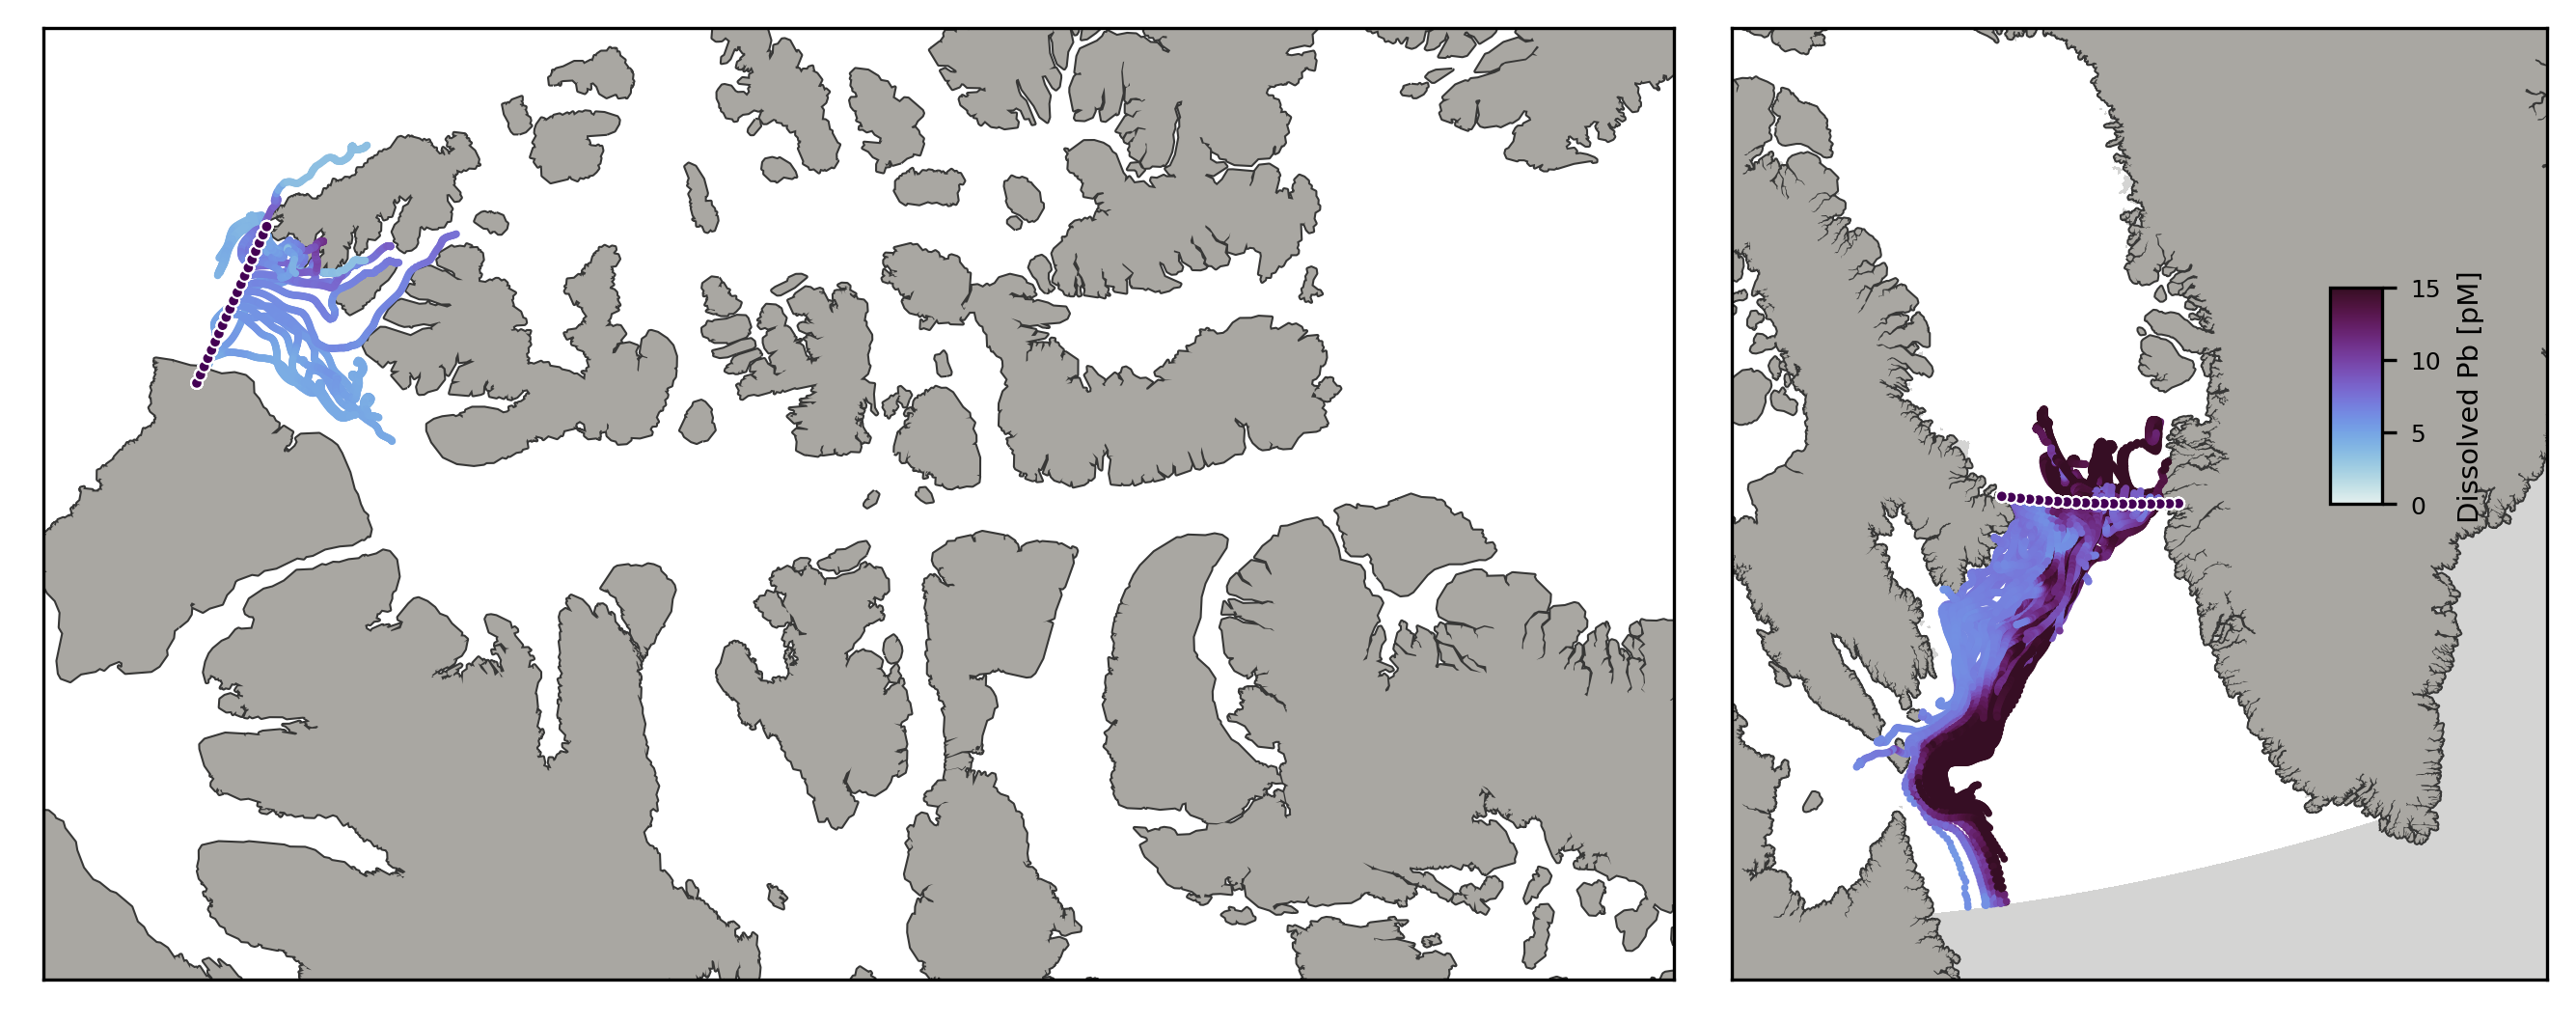

In [34]:
start_depth = depths[0]
plot_map_tracks(lon_t1[depth_t1[:,0] == start_depth], \
                lat_t1[depth_t1[:,0] == start_depth], \
                traj_t1[depth_t1[:,0] == start_depth], \
                dPb_t1[depth_t1[:,0] == start_depth]*1e12,\
                vmin=0, vmax=15, cmap1=cmocean.cm.dense)

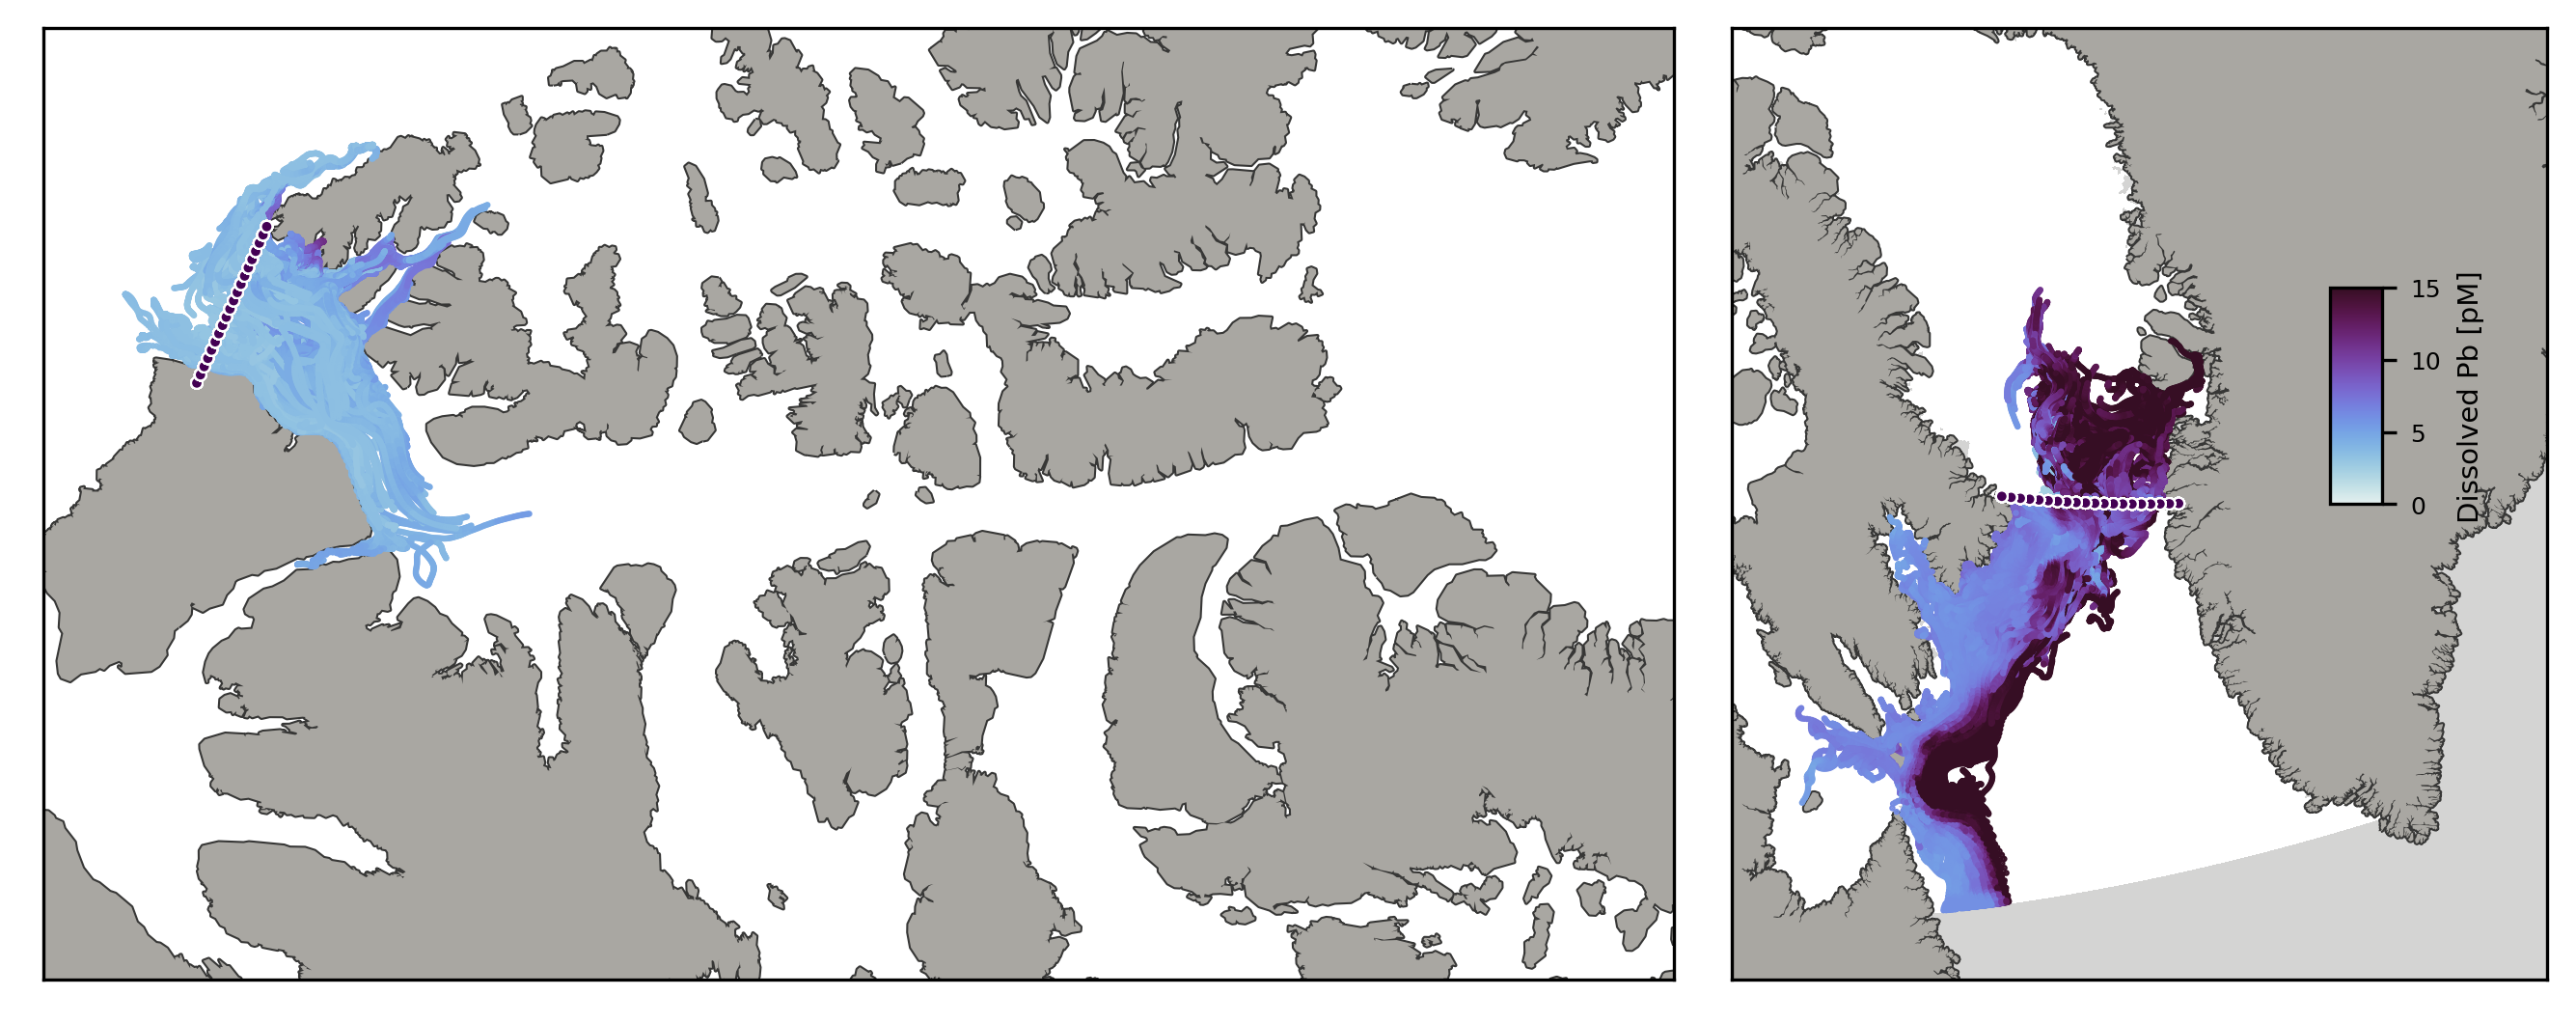

In [42]:
plot_map_tracks(lon_t1, lat_t1, traj_t1, dPb_t1*1e12, vmin=0, vmax=15, cmap1=cmocean.cm.dense)

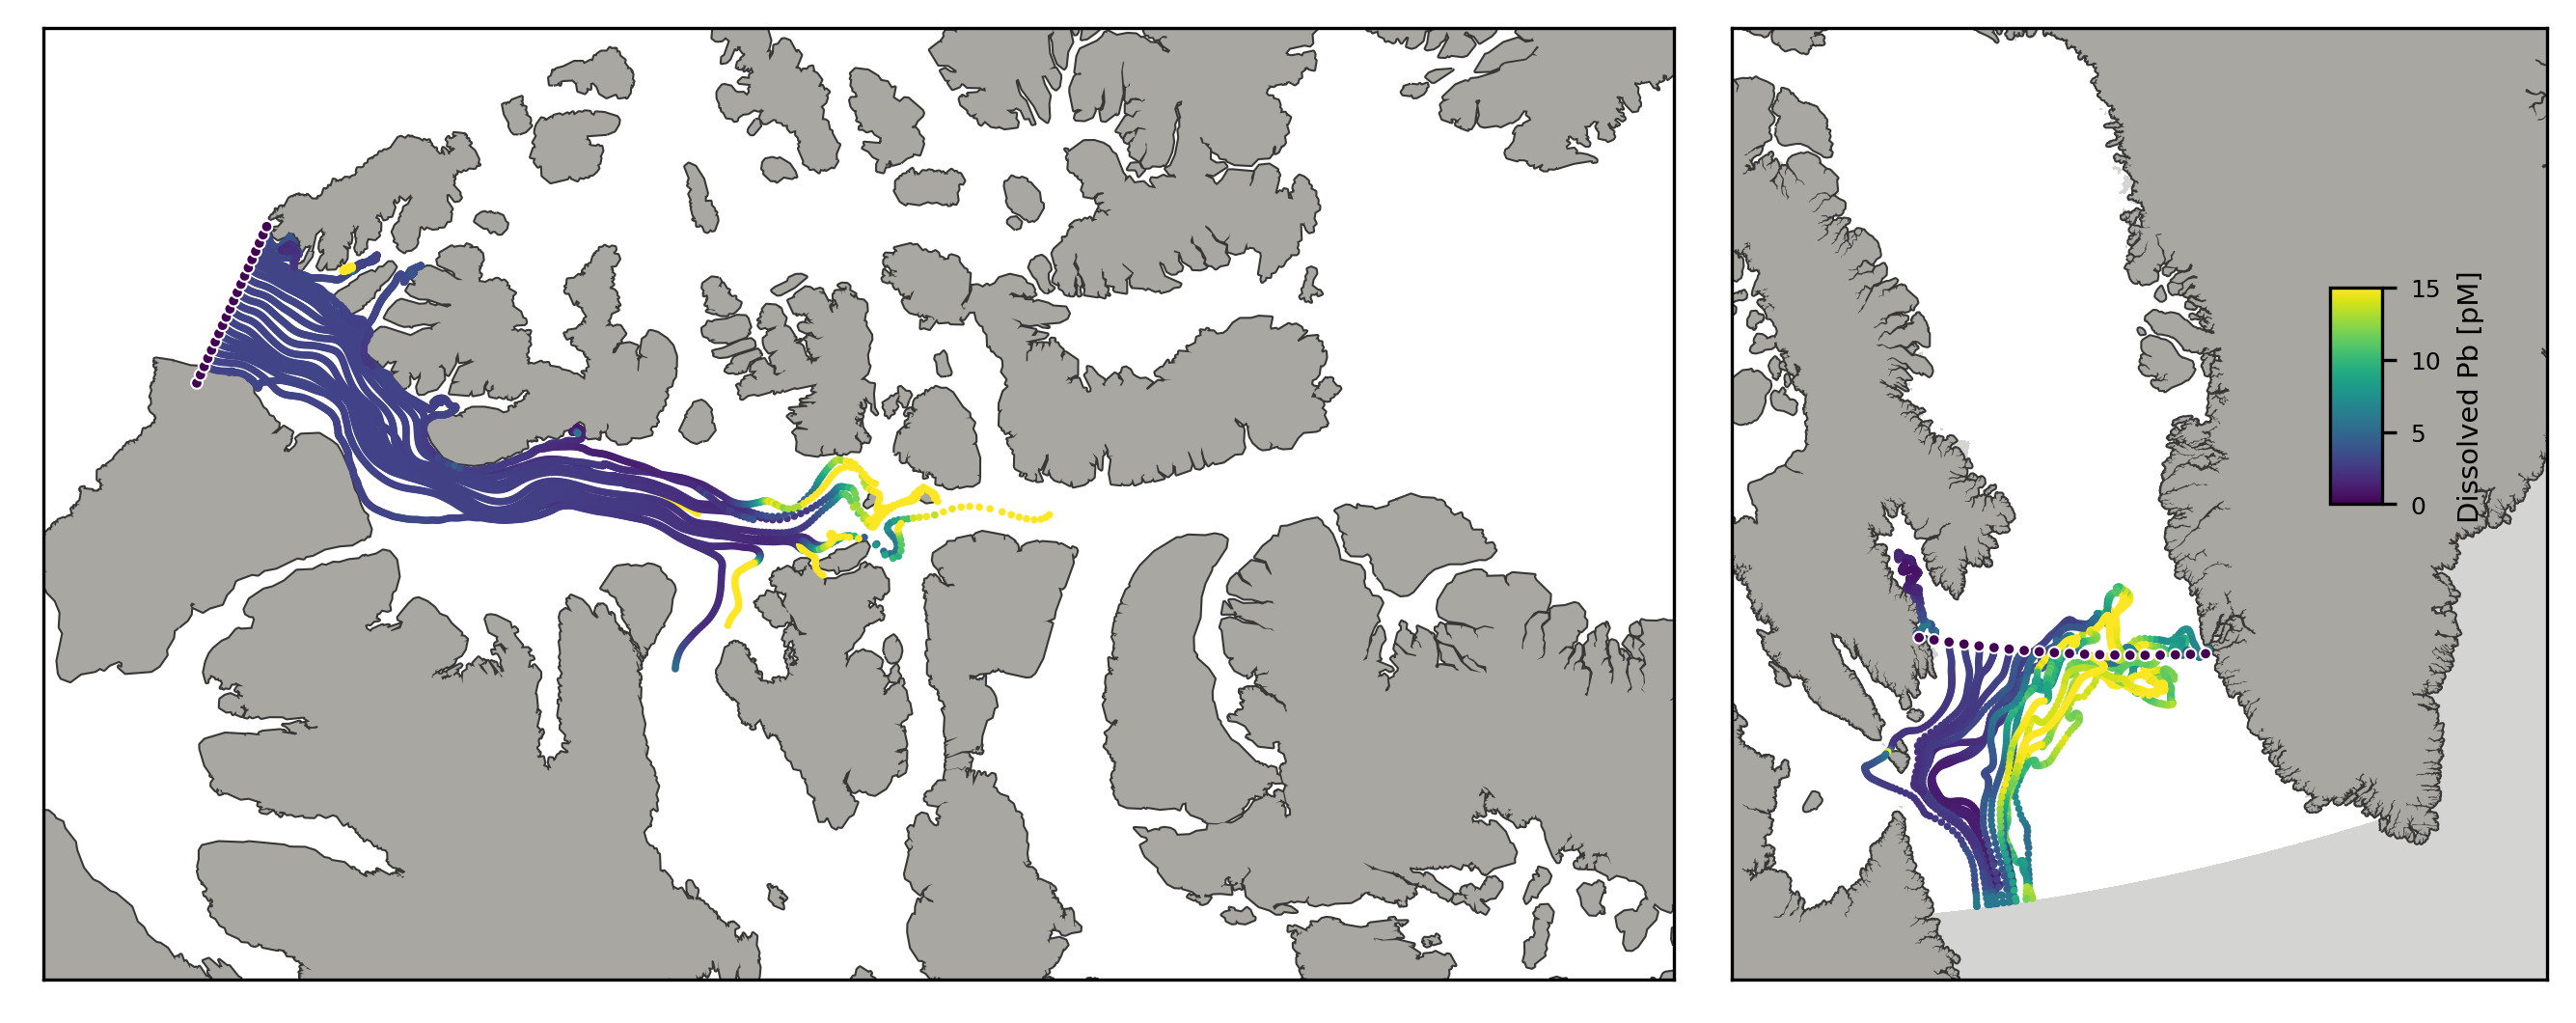

In [12]:
start_depth = depths[0]
plot_map_tracks(lon_t1[depth_t1[:,0] == start_depth], \
                lat_t1[depth_t1[:,0] == start_depth], \
                traj_t1[depth_t1[:,0] == start_depth], \
                dPb_t1[depth_t1[:,0] == start_depth]*1e12,\
                vmin=0, vmax=15)

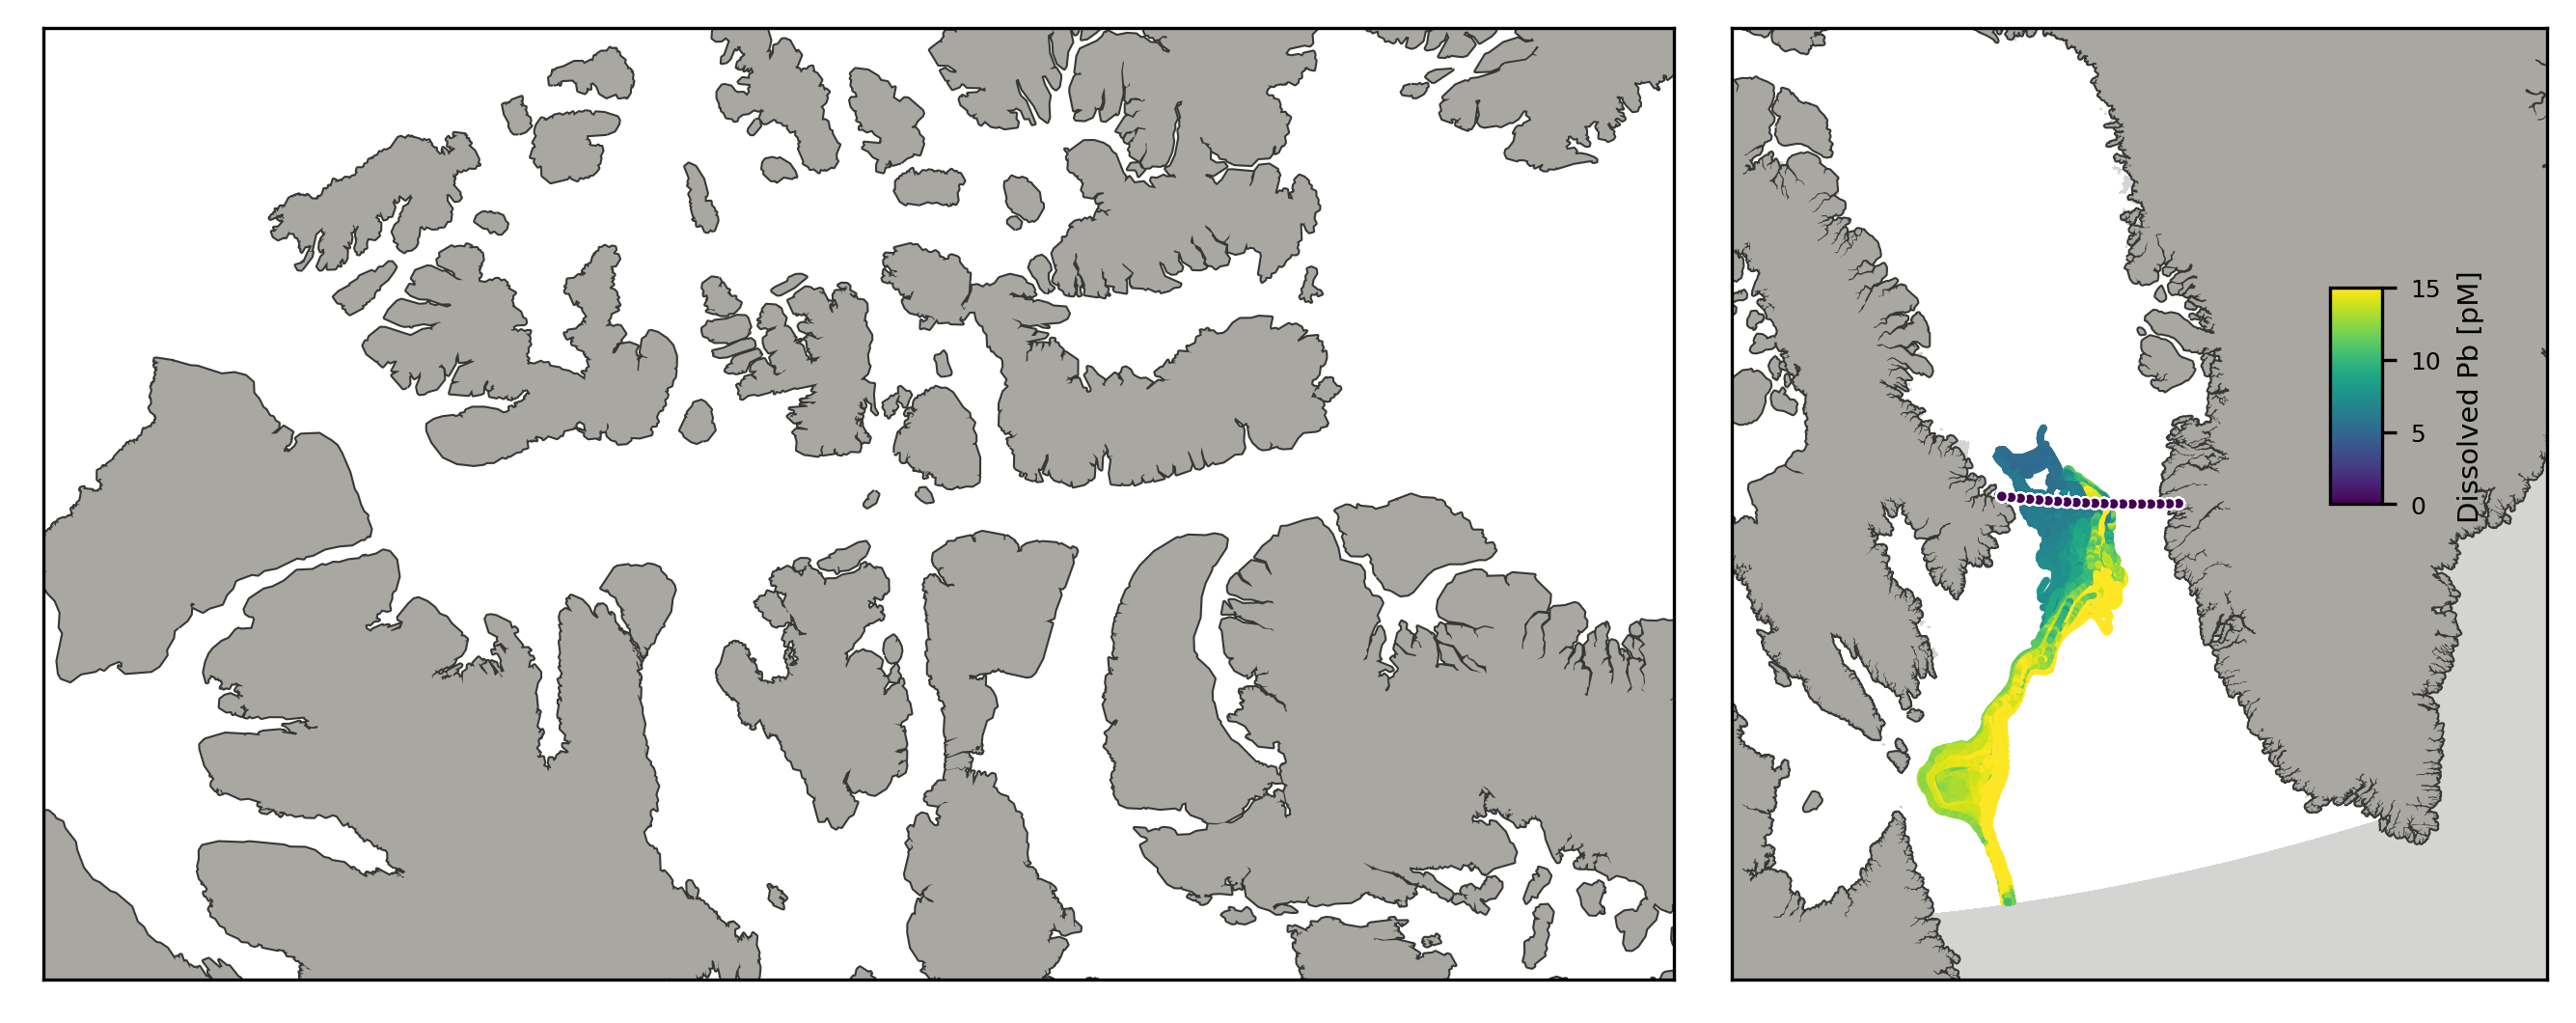

In [16]:
start_depth = depths[30]
plot_map_tracks(lon_t2[depth_t2[:,0] == start_depth], \
                lat_t2[depth_t2[:,0] == start_depth], \
                traj_t2[depth_t2[:,0] == start_depth], \
                dPb_t2[depth_t2[:,0] == start_depth]*1e12,\
                vmin=0, vmax=15)

i'm seeing very strong outflow from Davis Strait for particles released in January 2002 --- try again but for particles released each month or every couple of weeks

Plot similar map as above but with change in concentration of parcel relative to previous time step

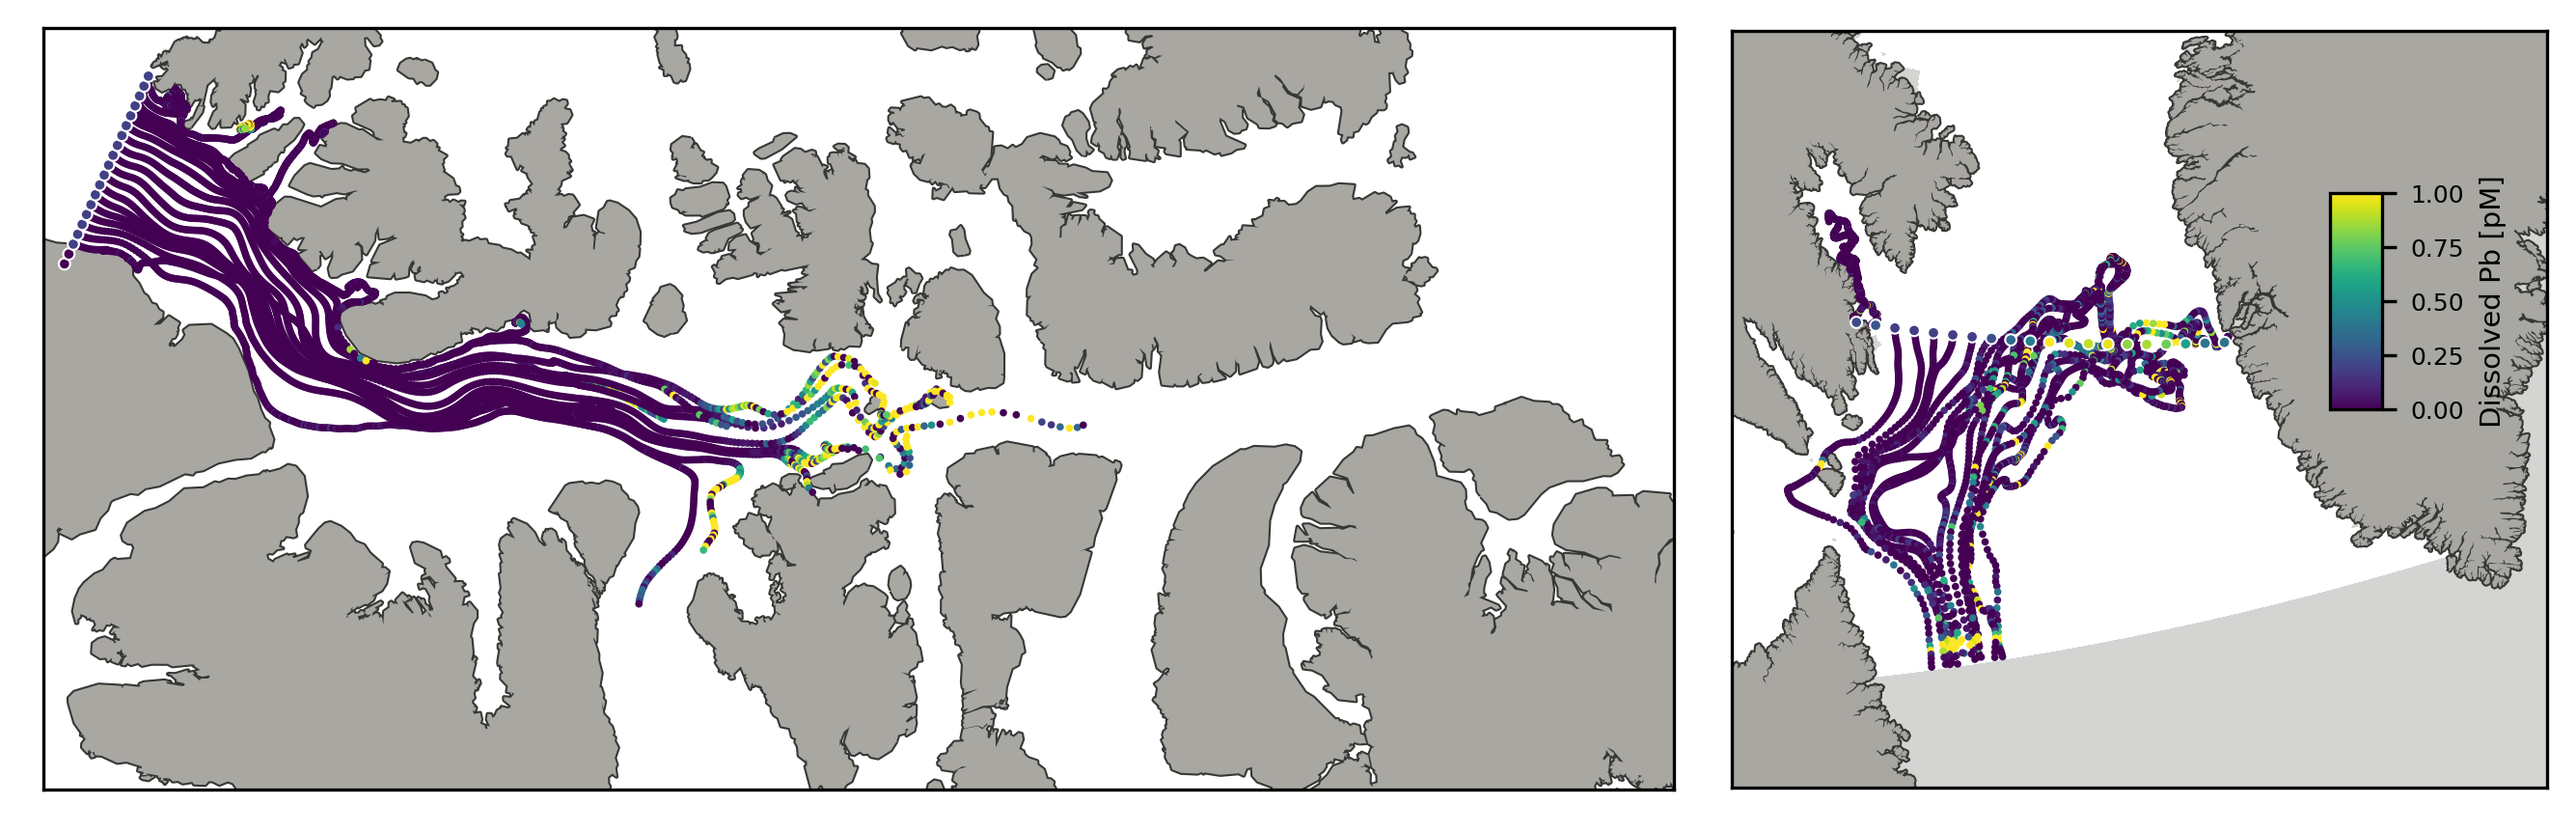

In [50]:
start_depth = depths[0]
plot_map_tracks(lon_t1[depth_t1[:,0] == start_depth][:,0:-1], \
                lat_t1[depth_t1[:,0] == start_depth][:,0:-1], \
                traj_t1[depth_t1[:,0] == start_depth], \
                np.diff(dPb_t1[depth_t1[:,0] == start_depth]*1e12),\
                vmin=0, vmax=1) # edit diff with prepend later

#### Add animation of particle tracks

In [ ]:
paths = path(1)
data    = xr.open_dataset(f'{base_folder}test2-20230214.nc')
coords  = xr.open_dataset(paths['coords'], decode_times=False)
mask    = xr.open_dataset(paths['mask'])
time    = data.time[0,:]

In [ ]:
def order_data_bytime(data):  #Here we encapsulate everything that happens at the same time together (It is easier to animate this way) 
    '''Change to use your variables of interest'''
    DS  = data.to_dataframe()
    lon = np.array(DS.sort_values(by='time').lon)
    lat = np.array(DS.sort_values(by='time').lat)
    z   = np.array(DS.sort_values(by='time').z)
    age = np.array(DS.sort_values(by='time').tau)/3600
    T   = np.array(DS.sort_values(by='time').time)

    Tint = []
    for ti in T:
        try:
            Tint.append(int(ti)) 
        except TypeError: 
            pass
            
    Tint = np.array(Tint)
    Age = []
    Z = []
    Lat = []
    Lon = []
    t = time[0]
    while int(t) < int(time[-1]): 
        Lat.append(lat[np.where(Tint==int(t))])
        Lon.append(lon[np.where(Tint==int(t))])
        Age.append(age[np.where(Tint==int(t))])
        Z.append(z[np.where(Tint==int(t))])
        t+=np.timedelta64(2, 'h')

    return Lat,Lon,Age,Z

def scatter_particles(ax,nmin,lat,lon,Z,vmin,vmax,Map=1): 
    scatter=[]
    if Map == 0:     
        scatter.append(ax.scatter(lon[nmin], lat[nmin],s=4,c=Z[nmin],cmap=cmocean.cm.tempo,vmin=vmin,vmax=vmax,alpha=0.5))  
    else:
        scatter.append(ax.scatter(lon[nmin], lat[nmin],s=4,c=Z[nmin],cmap=cmocean.cm.tempo,vmin=vmin,vmax=vmax,alpha=0.5,
                                  zorder=3,transform=crs.PlateCarree()))
    return scatter

def mapanimation(outfile,vmin,vmax,fps=1,Map=1):
    
    ds = xr.open_dataset(outfile) #This function just loads data
    time = ds.time[0,:]
    Lat,Lon,Age,Z = order_data_bytime(ds)
    
    fig = plt.figure(figsize=(8, 8))
    lonmin = np.min(ds.lon)
    lonmax = np.max(ds.lon)
    latmin = np.min(ds.lat)
    latmax = np.max(ds.lat)
    ax = plt.axes(xlim=(lonmin,lonmax),ylim=(latmin,latmax))
    plt.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
    ax.grid()
    f = 1.0/np.cos(49.5*np.pi/180)
    plt.gca().set_aspect(f)

    def update(frame):
        global ss
        for scat in ss:
            scat.remove()
        t = ax.text(0.02, 0.02, '', color='black', 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'), transform=ax.transAxes)
        tstamp = time[frame].values.astype('datetime64[s]').astype(datetime)
        t.set_text(tstamp.strftime('%Y-%b-%d %H:%M'))
        ss = scatter_particles(ax, frame, Lat,Lon,Age,vmin,vmax,Map)
        
    return animation.FuncAnimation(fig, update, frames=np.arange(0,len(time[:-1]),fps))

In [ ]:
Lat,Lon,Age,Z = order_data_bytime(data)
Dat=xr.open_dataset(paths['coords'],decode_times=False)

In [ ]:
anim = mapanimation(outfile, 0, 350, 10, Map=0)

file = r'/ocean/brogalla/GEOTRACES/parcels/Pb-chapter/Davis-Strait.gif'
anim.save(file, writer = animation.FFMpegWriter())

In [ ]:
with open(f,'rb') as anim:
     display(Image(anim.read()))